#### The following is a mini-project submission for Springboard's Data Science Career Track. Work completed by H. Passmore.
#### Project Summary: In this notebook I address statistical questions using a data set of 11497 independent samples of hospital dischrage and readmission data. Using exploratory data analysis techniques I address questions of appropriate statistical tests, normality, and interpretation of statistical tests with implications for hospital policy changes.

# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/pgagnon/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


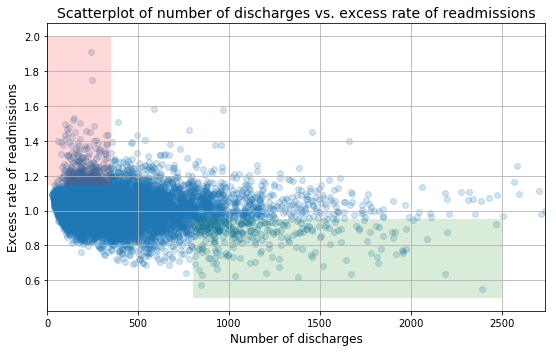

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# My turn
import seaborn as sns
import scipy.stats
from scipy.stats import norm
sns.set()

In [7]:
clean_hospital_read_df.head()
# where there are zero discharges there are no readmissions: remove those rows

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [8]:
# clean a little more: remove Nan from Excess Readmission Ratio
working_hospital_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
working_hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


#### A. Do you agree with the above analysis and recommendations? Why or why not?
* __Answer__: The results provided above are incomplete and the interpretation is unsubstantiated.
    * The plot alone is not enough to conlude that the readmission rate is 'trending down'.
    * The statements about lower/higher numbers of discharges are not based on good assessments of the data. While the highest 'excess rates of readmission' occur for hospitals with low 'number of discharges' the bulk of those hospitals have much lower rates of readmission. These outliers need to be explored.
    * The calculations for the 'statistics' are not shown. Even if the rates and percentages reported are correct, they are not evidence of a statistical difference.
    * The statement of significance in the correlation of the variables is not calculated or substantiated.
    * The conclusions about small hospitals and the regulatory policy recommendations are apparently based on visual interpretations (since the statistics are not calculated here) and therefore may be false and irresponsible.

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
#### B.1. Setup an appropriate hypothesis test.
* __Null Hypothesis:__ The excess rate of readmission is independent of the number of discharges per hospital
* __Alternative Hypothesis:__ Number of discharges per hospital is correlated with excess rate of readmission.

#### B.2. Compute and report the observed significance value (or p-value).

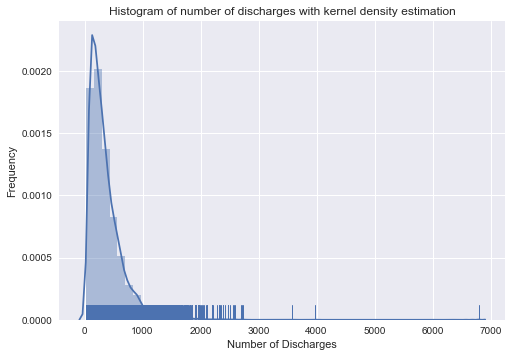

In [9]:
# are the two variables normally distributed?
# check the count data first
sns.distplot(working_hospital_df['Number of Discharges'], kde=True, rug=True);
plt.title('Histogram of number of discharges with kernel density estimation');
plt.xlabel('Number of Discharges');
plt.ylabel('Frequency');
# Data are skewed, not normally distributed

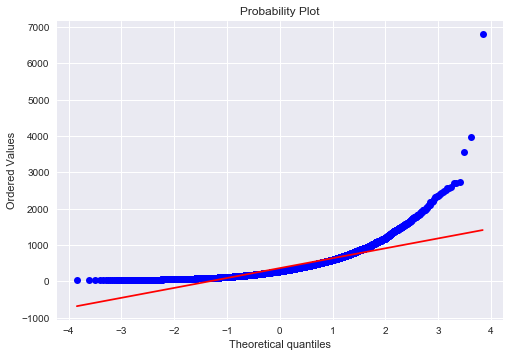

In [10]:
# check normality of number of discharges with Q-Q plot
scipy.stats.probplot(working_hospital_df['Number of Discharges'], dist='norm', fit=True, plot=plt);
# Q-Q plot backs up the observation that the data for discharge number are skewed

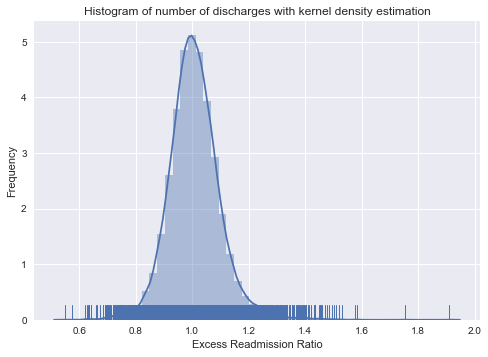

In [11]:
# check the ratio data second
sns.distplot(working_hospital_df['Excess Readmission Ratio'], kde=True, rug=True);
plt.title('Histogram of number of discharges with kernel density estimation');
plt.xlabel('Excess Readmission Ratio');
plt.ylabel('Frequency');
# distribution of the ratio data are more like a normal distribution

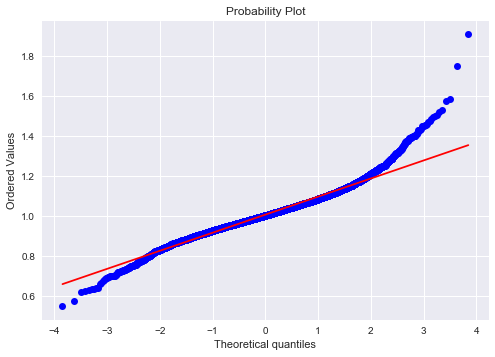

In [12]:
# check normality of number of discharges with Q-Q plot
scipy.stats.probplot(working_hospital_df['Excess Readmission Ratio'], dist='norm', fit=True, plot=plt);
# the shape of this Q-Q plot is typical for data with 'heavy tails' (more extreme values than expected) 

In [13]:
small_df = pd.DataFrame(working_hospital_df[['State','Number of Discharges','Excess Readmission Ratio']])
small_df.rename(columns={'State': 'state', 'Number of Discharges': 'NOD', 'Excess Readmission Ratio': 'ERR'}, inplace=True)
small_df.head()

,state,NOD,ERR
1832,MD,25,1.0914
1699,MD,27,1.0961
1774,MD,28,1.0934
1853,CA,29,1.0908
1290,PA,30,1.1123


In [14]:
# The number of discharges are count data and predictably non-normal
# Log transform 'Number of Discharges' to improve normality
# there are better ways to deal with non-normal count data (e.g., Poisson model), but log transforming helps with EDA
new_small = small_df.assign(log_NOD = lambda x: np.log(x.NOD))
new_small.head()

,state,NOD,ERR,log_NOD
1832,MD,25,1.0914,3.218876
1699,MD,27,1.0961,3.295837
1774,MD,28,1.0934,3.332205
1853,CA,29,1.0908,3.367296
1290,PA,30,1.1123,3.401197


In [18]:
# reindex 'small_df' 
new_small = new_small.reset_index(drop=True)

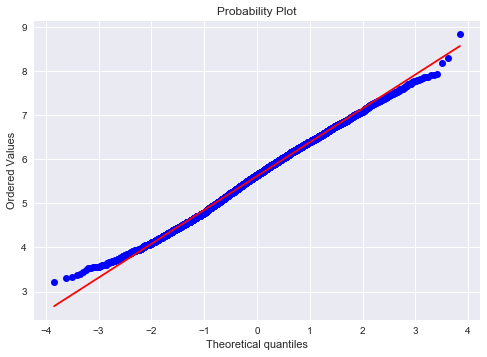

In [19]:
# check normality of number of discharges with Q-Q plot
scipy.stats.probplot(new_small['log_NOD'], dist='norm', fit=True, plot=plt);
# the log transformation makes Q-Q plots look more like from a normal distribution

In [20]:
# test correlation of two variables with the log-transformed counts and the ratio data (not transformed) 
r, p = scipy.stats.pearsonr(new_small.ERR, new_small.log_NOD)
print('Pearson correlation coefficient:',r)
print('p-value:', p)

Pearson correlation coefficient: -0.0976697848047
p-value: 8.96278460503e-26


#### B.3. Report statistical significance for  $\alpha$  = .01.
* Based on the Pearson correlation coefficient there is a very weak negative correlation (r = -0.1) between log-transformed hopital discharge counts and Excess Readmission Ratio (ERR). Although the correlation is weak, the __correlation coefficient is significant based on the p-value__ which is much less than the $\alpha$ level of 0.01.

#### B.4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
* __Significance of test__: 
    * Although the correlation coefficient is significant __the relationship between the two variables is weak.__ 
    * It is not reasonable to make policy decisions about Number of Discharges (as a proxy for hospital size) and ERR based on the significance value alone. 
    * Also, note that the correlation coefficient is negative indicating that as the proxy for hospital size goes up, the ERR decreases as described original conclusions. 
    * Statistical and practical significance are very different in this case.
    
* __Recommendations__: 
    * Further analysis is needed. It may be that some other variable present in the dataset is more useful for explaining the differences in the ERR for different hospitals. Does ERR depend on the location/State of the facility? Is there an effect of time on the ERR? These and other variables may be more useful.
    * Outliers may be influencing the correlation. The Pearson r indicates a negative relationship (a very weak one) and the sign and value of r could change if outliers were determined to be errors and removed.
    * There is __no__ evidence from this analysis that small hospitals should be treated differently.

#### B.5. Look at the scatterplot above. 
* __What are the advantages and disadvantages of using this plot to convey information?__
    * __ ADVANTAGES__:
        * The scatter plot of discharges vs excess rate of readmission gives a sense of the central tendency in the data (where the scatter is thickest) as well as the number of data points that are more extreme for both axes. 
        * Further, the shaded red area may be useful for highlighting hospitals of concern and the shaded green areas may be useful for highlighting hospitals with better than average patient outcomes.
        
    * __DISADVANTAGES__: 
        * The scatter plot alone is not a statistical analysis. 
        * Graphing the raw data to draw conclusions is dangerous (outliers, non-normal distributions can affect interpretation).
        * The original scatter plot omitted data points for the three largest 'Number of Discharge' records without accounting for the reason or the effect on the interpretation of the figure.
        * The colored red and green shading is misleading and constructed without clear logic. I potentially biases interpretation of the figure and is not based on statistical or clear quantitative reasoning.
* __Construct another plot that conveys the same information in a more direct manner.__
    * My joint plot below includes the Pearson correlation coefficient and p-value calculated fromt the data. I also include joint plot histograms of the distribution of the data, which are more normally distributed becasue I log-transformed Number of Discharges. 

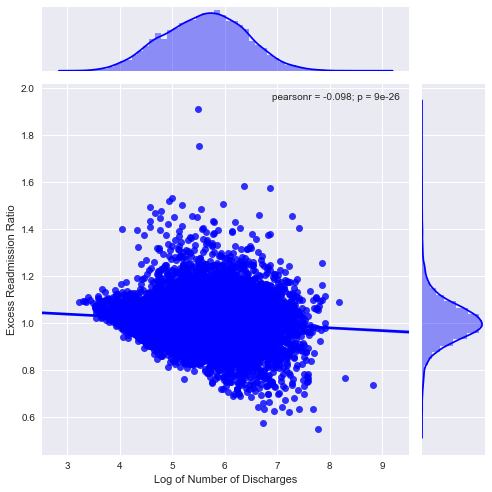

In [21]:
# plot log_discharges and ratio in a joint plot
sns.jointplot('log_NOD', 'ERR', data=new_small,
              kind='reg', color='blue', size=7);
plt.xlabel('Log of Number of Discharges');
plt.ylabel('Excess Readmission Ratio');